# Introduction

This is my take of Titanic dataset.

Table of contents:
1. [Processing & data analysis](#1)
    1. [Load & check data](#1.1)
    1. [Visualization](#1.3)
    1. [Variable analysis](#1.2)
    1. [Statistical outlier detection](#1.4)
    1. [Missing values](#1.5)
        1. [Embarked](#1.5.1)
        1. [Fare](#1.5.2)
        1. [Age](#1.5.3)
    1. [Correlations](#1.6)
        1. [Feature Engineering](#1.6.1)
1. [Machine learning approach](#2)
    1. [Random forest classification](#2.1)
    1. [Logistic regression](#2.2)
    1. [Decision Tree](#2.3)
1. [Deep learning approach](#3)
    1. [2-layered ANN](#3.1)
1. [Submission](#4)
    1. [Machine learning](#4.1)
    1. [Deep learning](#4.2)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")
# add these two last

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Preprocessing & data analysis <a id = "1"></a>

### Load & check data<a id = "1.1"></a>

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

all_data = pd.concat([train, test], axis=0).reset_index(drop=True)

In [3]:
print(all_data.info()) # 11 cols x 1309 rows total

print(train.info()) # 11 cols x 891 rows total

print(test.info()) # 10 cols x 418 rows total (no survival [y], for obvious reasons)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* PassengerId $\rightarrow$ unique ids for each passengers. Will need on testing data.
* Survived $\rightarrow$ shows if the passenger survived (1) or died (0). binary classification.
* Pclass $\rightarrow$ shows the class of the passenger. will be examined. Need to be converted.
* Name $\rightarrow$ name of the passenger, will be dropped because focusing on this will be overkill imo.
* Sex $\rightarrow$ need to be converted to binary or categorical data.
* Age $\rightarrow$ age of the passenger. This and sex will be examined.
* SibSp $\rightarrow$ # total number of the sibling and spouse 
* Parch $\rightarrow$ # total number of the parent and children 
* Ticket $\rightarrow$ # unique id of the tickets, will be dropped. 
* Fare $\rightarrow$ # how much passenger paid for the ticket
* Cabin $\rightarrow$ # cabin number. 
* Embarked $\rightarrow$ # which harbor passengers embarked. 

### Visualization <a id = "1.3"></a>

In [6]:
def bar_plot(df, feat, datasetName):
    v = df[feat]
    v_value = v.value_counts()
    
    plt.figure()    
    plt.bar(v_value.index, v_value)    
    plt.xticks(v_value.index, v_value.index.values)
    
    plt.ylabel("Count")
    plt.title(f"{datasetName} {feat.title()} Bar Plot")
    
    plt.show()
    
    print(f"{v_value}")
    
def histogram_plot(df, feat, bins, datasetName):
    v = df[feat]
    
    plt.figure()    
    plt.hist(v, bins = bins)
    
    plt.ylabel("Count")    
    plt.xlabel(feat)
    plt.title(f"{datasetName} {feat.title()} Distribution with Histogram")
    
    plt.show()
    
    print(f"{df[feat].value_counts()}")

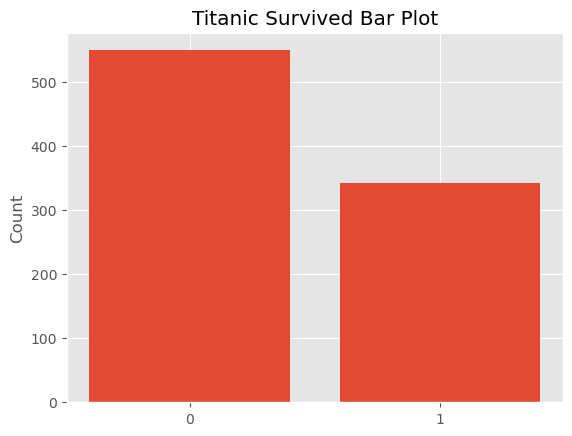

0    549
1    342
Name: Survived, dtype: int64


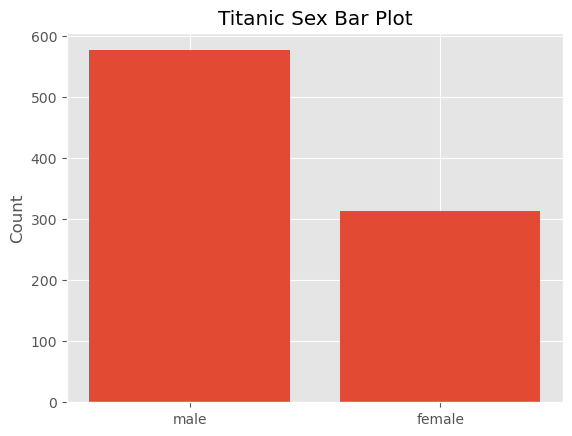

male      577
female    314
Name: Sex, dtype: int64


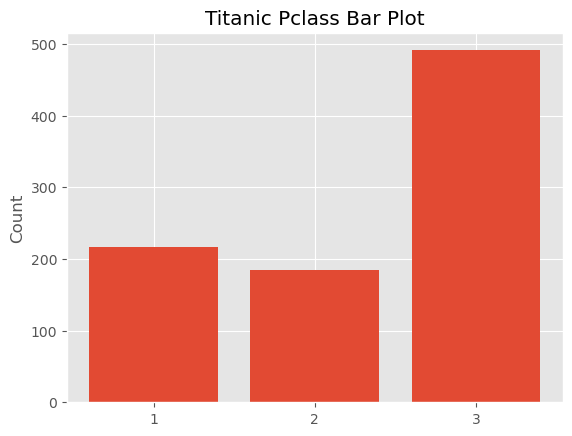

3    491
1    216
2    184
Name: Pclass, dtype: int64


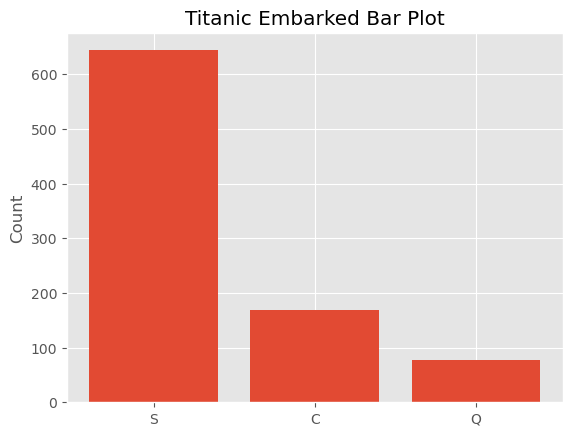

S    644
C    168
Q     77
Name: Embarked, dtype: int64


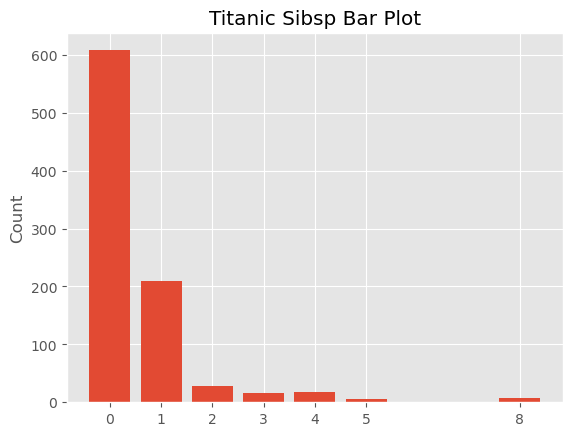

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


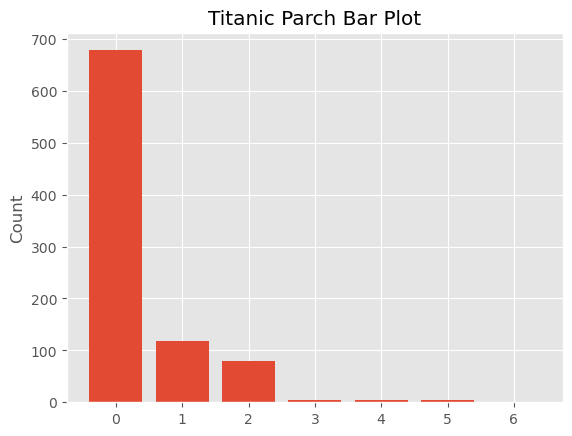

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [7]:
bar_vars = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for var in bar_vars:
    bar_plot(train, var, "Titanic")

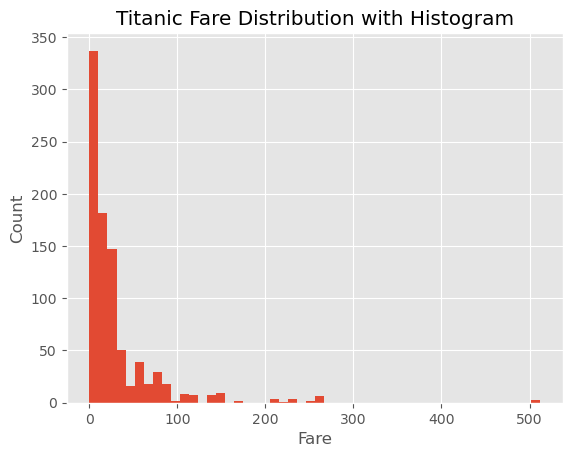

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


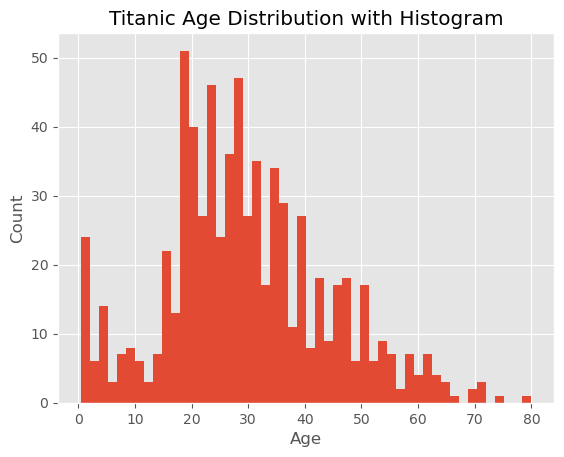

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


In [8]:
hist_vars = ["Fare", "Age"]

for var in hist_vars:
    histogram_plot(train, var, 50, "Titanic")

### Variable analysis <a id = "1.2"></a>

In [9]:
train.corr() #before any processing, Pclass and Fare seems most correlated to survived.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
train.info()

# age, cabin and embarked have missing values for train.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [12]:
print(train["Sex"].unique())
d_sex = {"male": 0, "female": 1}

train["Sex"] = train["Sex"].map(d_sex)
print(train.head())

['male' 'female']
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    0  22.0      1      0   7.2500        S
1            2         1       1    1  38.0      1      0  71.2833        C
2            3         1       3    1  26.0      0      0   7.9250        S
3            4         1       1    1  35.0      1      0  53.1000        S
4            5         0       3    0  35.0      0      0   8.0500        S


In [13]:
# Lets check the variables one by one on Survived column now.

train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [15]:
train[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [17]:
#lets apply these to the test dataframe

test.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
test["Sex"] = test["Sex"].map(d_sex)

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 26.2+ KB


### Statistical outlier detection <a id=1.4></a>

In [19]:
from collections import Counter

def statistical_outlier(df, feat, threshold):
    outlier_indices = []
    
    for f in feat:
        q1 = np.percentile(df[f], 25)
        q3 = np.percentile(df[f], 75)
        iqr = q3 - q1
        
        outlier_df_index = df[(df[f] < q1 - iqr * 1.5) | (df[f] > q3 + iqr * 1.5)].index
        
        outlier_indices.extend(outlier_df_index)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > threshold)
    
    return multiple_outliers

In [20]:
train.loc[statistical_outlier(train, ["Age", "SibSp", "Parch", "Fare"], 2)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,28,0,1,0,19.0,3,2,263.00,S
88,89,1,1,1,23.0,3,2,263.00,S
159,160,0,3,0,NaN,8,2,69.55,S
180,181,0,3,1,NaN,8,2,69.55,S
201,202,0,3,0,NaN,8,2,69.55,S
324,325,0,3,0,NaN,8,2,69.55,S
341,342,1,1,1,24.0,3,2,263.00,S
792,793,0,3,1,NaN,8,2,69.55,S
846,847,0,3,0,NaN,8,2,69.55,S
863,864,0,3,1,NaN,8,2,69.55,S


In [21]:
train = train.drop(statistical_outlier(train, ["Age", "SibSp", "Parch", "Fare"], 2), axis=0).reset_index(drop= True)

### Missing Values <a id=1.5></a>

In [22]:
train_len = len(train)
all_data = pd.concat([train, test], axis= 0).reset_index(drop = True) # we have to merge datasets for 

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Sex          1299 non-null   int64  
 4   Age          1043 non-null   float64
 5   SibSp        1299 non-null   int64  
 6   Parch        1299 non-null   int64  
 7   Fare         1298 non-null   float64
 8   Embarked     1297 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 91.5+ KB


In [23]:
all_data.columns[all_data.isnull().any()] # survived missing in test set for obvious reasons. 

Index(['Survived', 'Age', 'Fare', 'Embarked'], dtype='object')

In [24]:
all_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            256
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

#### Embarked <a id=1.5.1></a>
Two values are missing

In [25]:
all_data[all_data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
60,62,1.0,1,1,38.0,0,0,80.0,NaN
821,830,1.0,1,1,62.0,0,0,80.0,NaN


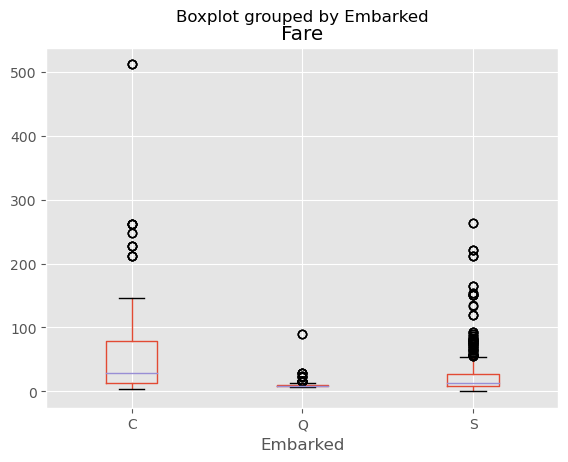

S    904
C    270
Q    123
Name: Embarked, dtype: int64


In [26]:
all_data.boxplot(column="Fare", by = "Embarked")
plt.show()

print(all_data["Embarked"].value_counts())

#From these values, it seems to fill nans with 'C' or 'S'. Lets check in more detail in next cells.

In [27]:
print(all_data[all_data["Embarked"] == 'C']["Pclass"].value_counts())
print(all_data[all_data["Embarked"] == 'S']["Pclass"].value_counts())

1    141
3    101
2     28
Name: Pclass, dtype: int64
3    488
2    242
1    174
Name: Pclass, dtype: int64


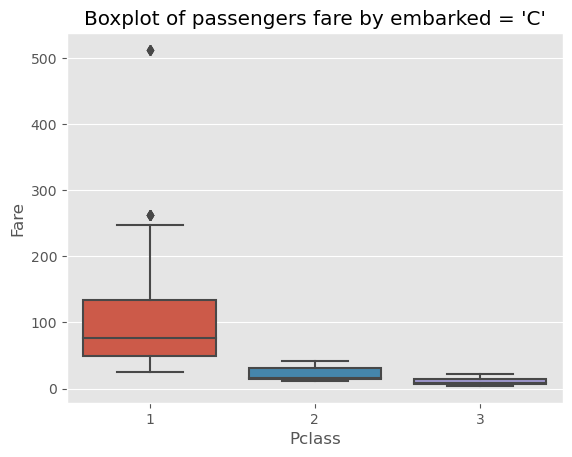

In [28]:
filtered_c = all_data[all_data['Embarked'] == 'C']

sns.boxplot(x="Pclass", y="Fare", data=filtered_c)
plt.title("Boxplot of passengers fare by embarked = 'C'")
plt.show()

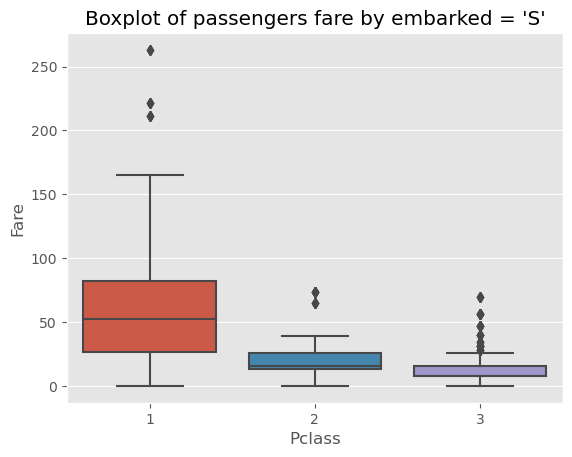

In [29]:
filtered_s = all_data[all_data['Embarked'] == 'S']

sns.boxplot(x="Pclass", y="Fare", data=filtered_s)
plt.title("Boxplot of passengers fare by embarked = 'S'")
plt.show()

In [30]:
## It seems both filling will work, I will continue with "S"

all_data["Embarked"] = all_data["Embarked"].fillna("S")

#### Fare <a id=1.5.2></a>
Only one value is missing. Therefore just putting mean of that Pclass won't make big difference (meaning that another techniques will also work)

In [31]:
all_data[all_data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1033,1044,NaN,3,0,60.5,0,0,NaN,S


In [32]:
all_data["Fare"] = all_data["Fare"].fillna(np.mean(all_data[all_data["Pclass"] == 3]["Fare"]))

#### Age <a id=1.5.3></a>
This is the hardest one to fill amongst three.

In [33]:
all_data[all_data["Age"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0.0,3,0,NaN,0,0,8.4583,Q
17,18,1.0,2,0,NaN,0,0,13.0000,S
19,20,1.0,3,1,NaN,0,0,7.2250,C
26,27,0.0,3,0,NaN,0,0,7.2250,C
27,29,1.0,3,1,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,1,NaN,0,0,7.7208,Q
1291,1302,NaN,3,1,NaN,0,0,7.7500,Q
1294,1305,NaN,3,0,NaN,0,0,8.0500,S
1297,1308,NaN,3,0,NaN,0,0,8.0500,S


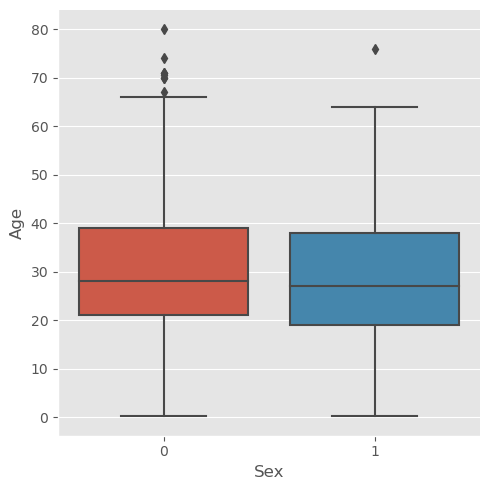

In [34]:
# lets first check age distribution by sex.

sns.catplot(x = "Sex", y= "Age", data=all_data, kind="box")
plt.show()

Age distribution by sex is quite similar.

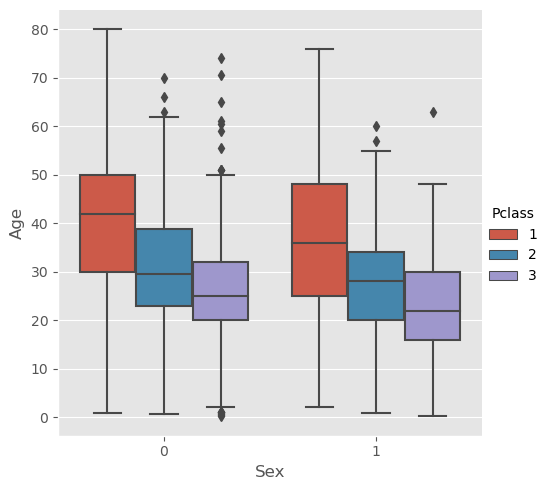

In [35]:
sns.catplot(x = "Sex", y= "Age", hue = "Pclass", data=all_data, kind="box")
plt.show()

Higher classes are older. Decent approach.

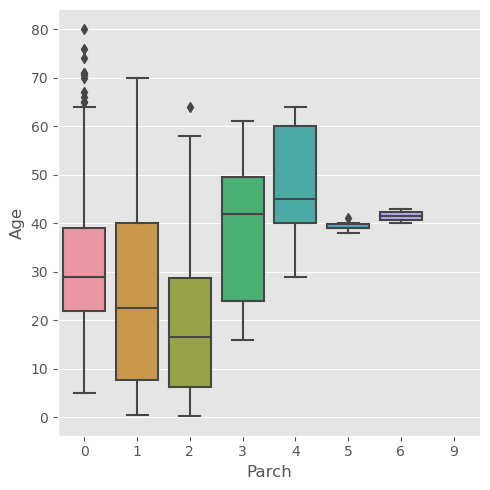

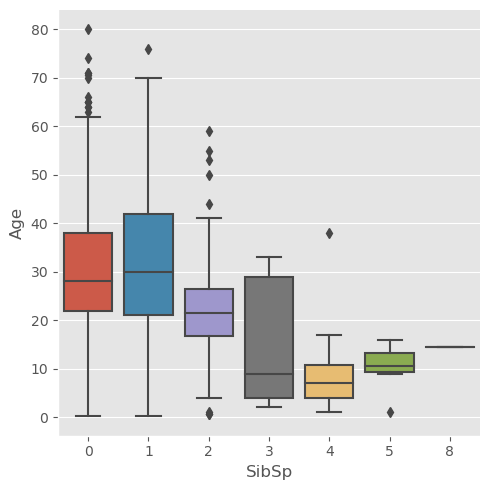

In [36]:
sns.catplot(x = "Parch", y= "Age", data=all_data, kind="box")
plt.show()

sns.catplot(x = "SibSp", y= "Age", data=all_data, kind="box")
plt.show()

Finally, lets check correlations all together.

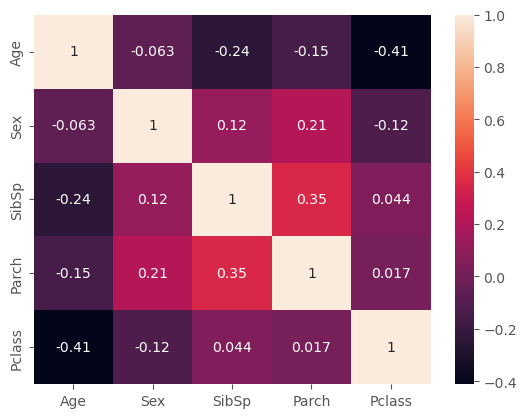

In [37]:
sns.heatmap(all_data[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot=True)
plt.show()

Age is most correlated with sibsp and pclass. Therefore I will use these two columns for filling missing values.

In [38]:
index_nan_age = list(all_data["Age"][all_data["Age"].isnull()].index)
print(index_nan_age)

[5, 17, 19, 26, 27, 28, 30, 31, 35, 41, 44, 45, 46, 47, 54, 63, 64, 75, 76, 81, 86, 93, 99, 105, 107, 119, 124, 126, 138, 152, 156, 163, 165, 173, 177, 181, 182, 192, 194, 209, 218, 224, 230, 235, 236, 245, 251, 255, 259, 265, 269, 272, 279, 290, 293, 295, 296, 298, 299, 301, 324, 328, 329, 340, 344, 347, 351, 352, 357, 360, 361, 368, 377, 381, 402, 403, 404, 406, 408, 413, 418, 421, 424, 437, 444, 447, 450, 452, 457, 459, 461, 463, 468, 474, 478, 483, 488, 490, 495, 500, 504, 510, 515, 517, 520, 524, 526, 531, 540, 545, 550, 553, 556, 557, 561, 566, 571, 577, 582, 586, 589, 591, 594, 595, 604, 605, 606, 622, 626, 632, 636, 641, 643, 646, 649, 660, 662, 667, 673, 685, 690, 702, 704, 711, 720, 725, 731, 732, 733, 753, 759, 761, 766, 769, 771, 776, 783, 785, 807, 817, 818, 820, 824, 829, 831, 840, 850, 858, 868, 878, 891, 903, 910, 914, 917, 920, 922, 928, 935, 939, 946, 957, 964, 965, 966, 969, 972, 974, 983, 988, 989, 992, 997, 1002, 1005, 1008, 1013, 1014, 1027, 1029, 1032, 1041, 1044

In [39]:
for i in index_nan_age:
    related_data = all_data["Age"][((all_data["SibSp"] == all_data.iloc[i]["SibSp"]) & (all_data["Pclass"] == all_data.iloc[i]["Pclass"]))]
    related_med = related_data.median()     
    related_mean = related_data.mean() 
    pred = (related_med + related_mean) // 2 # -> Integers
    
    all_data.loc[i, "Age"] = pred

In [40]:
all_data.info() # No more missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Sex          1299 non-null   int64  
 4   Age          1299 non-null   float64
 5   SibSp        1299 non-null   int64  
 6   Parch        1299 non-null   int64  
 7   Fare         1299 non-null   float64
 8   Embarked     1299 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 91.5+ KB


### Correlations <a id=1.6></a>
We already did a lot of correlations on previous sections. Lets check one last time.

In [41]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

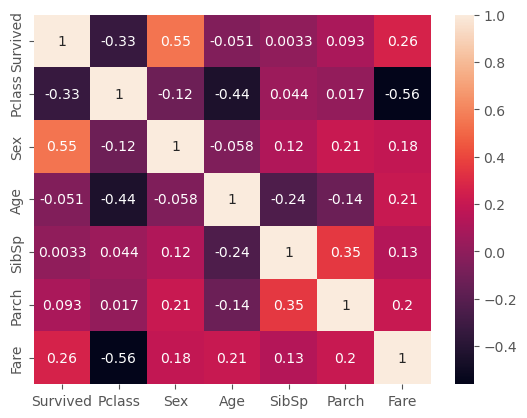

In [42]:
sns.heatmap(all_data[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].corr(), annot=True)
plt.show()

Pclass and Sex seems most correlated on survived followed by Fare. Lets make some feature engineering to make all columns ready to train.

#### Feature Engineering <a id=1.6.1></a>

In [43]:
all_data = pd.get_dummies(all_data, columns=["Embarked"])
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1.0,1,1,38.0,1,0,71.2833,1,0,0
2,3,1.0,3,1,26.0,0,0,7.9250,0,0,1
3,4,1.0,1,1,35.0,1,0,53.1000,0,0,1
4,5,0.0,3,0,35.0,0,0,8.0500,0,0,1


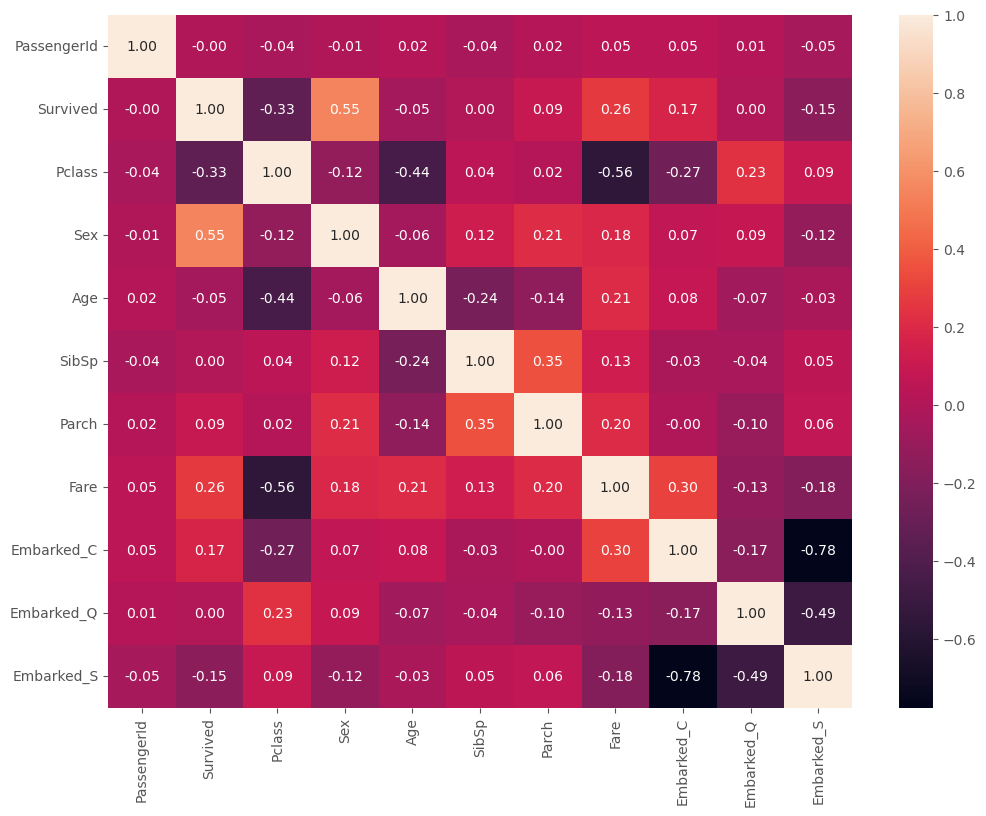

In [44]:
plt.figure(figsize = (12, 9))
sns.heatmap(all_data.corr(), annot=True, fmt='.2f')
plt.show()

## Machine learning approach <a id = "2"></a>

Lets first re-acquiring train & test.

In [45]:
train = all_data[:train_len]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    float64
 2   Pclass       881 non-null    int64  
 3   Sex          881 non-null    int64  
 4   Age          881 non-null    float64
 5   SibSp        881 non-null    int64  
 6   Parch        881 non-null    int64  
 7   Fare         881 non-null    float64
 8   Embarked_C   881 non-null    uint8  
 9   Embarked_Q   881 non-null    uint8  
 10  Embarked_S   881 non-null    uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 57.8 KB


In [46]:
test = all_data[train_len:]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 881 to 1298
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     0 non-null      float64
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked_C   418 non-null    uint8  
 9   Embarked_Q   418 non-null    uint8  
 10  Embarked_S   418 non-null    uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 27.5 KB


### Random forest classification <a id = "2.1"></a>

In [47]:
from sklearn.model_selection import train_test_split

print(train.columns)

feats = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]

X = train[feats]

Y = train["Survived"]

print(X.info())
print(Y.info())

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      881 non-null    int64  
 1   Sex         881 non-null    int64  
 2   Age         881 non-null    float64
 3   SibSp       881 non-null    int64  
 4   Parch       881 non-null    int64  
 5   Fare        881 non-null    float64
 6   Embarked_C  881 non-null    uint8  
 7   Embarked_Q  881 non-null    uint8  
 8   Embarked_S  881 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.0 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 881 entries, 0 to 880
Series name: Survived
Non-Null Count  Dtype  
--------------  -----  
881 non-null    float64
dtypes: float64(1)
memory usage: 7.0 KB
None


In [48]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_rfc.fit(X_train, Y_train)
y_val_pred = model_rfc.predict(X_val)

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_val, y_val_pred)

0.8248587570621468

### Logistic regression <a id = "2.2"></a>

In [50]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, Y_train)

y_val_pred = model_lr.predict(X_val)

accuracy_score(Y_val, y_val_pred)

0.7909604519774012

### Decision tree classifier <a id = "2.3"></a>

In [51]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train, Y_train)

y_val_pred = model_dt.predict(X_val)

accuracy_score(Y_val, y_val_pred)

0.7853107344632768

In [52]:
# We will submit the RFC for machine learning.

## Deep learning approach <a id = "3"></a>
Lets first normalize columns

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)

X_train, X_val, Y_train, Y_val = train_test_split(X_normalized, Y, test_size = 0.2, random_state = 42)

### 2-layered ANN <a id = "3.1"></a>

In [54]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

class TwoLayeredANN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.LeakyReLU(negative_slope=1e-1)
        self.fc2 = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        h = self.fc1(x)
        h = self.relu(h)
        h = self.fc2(h)
        return torch.sigmoid(h)   

In [55]:
model = TwoLayeredANN(9, 4)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epoch = 250

In [56]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(Y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(Y_val.to_numpy())

(704, 9)
(177, 9)
(704,)
(177,)


In [57]:
for e in range(epoch):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()
    
    
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor.view(-1, 1))
        val_preds = torch.round(val_outputs)
        val_accuracy = (val_preds == y_val_tensor.view(-1, 1)).sum().item() / len(y_val_tensor)
    
    
    if (e + 1) % 25 == 0 or e == 0:
        print(f"Epoch {e+1}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}")

Epoch 1, Loss: 0.6774, Val Loss: 0.6820, Val Accuracy: 0.5989
Epoch 25, Loss: 0.6728, Val Loss: 0.6780, Val Accuracy: 0.5989
Epoch 50, Loss: 0.6688, Val Loss: 0.6745, Val Accuracy: 0.5989
Epoch 75, Loss: 0.6646, Val Loss: 0.6708, Val Accuracy: 0.5989
Epoch 100, Loss: 0.6585, Val Loss: 0.6652, Val Accuracy: 0.5989
Epoch 125, Loss: 0.6487, Val Loss: 0.6566, Val Accuracy: 0.5989
Epoch 150, Loss: 0.6380, Val Loss: 0.6471, Val Accuracy: 0.5989
Epoch 175, Loss: 0.6277, Val Loss: 0.6379, Val Accuracy: 0.5989
Epoch 200, Loss: 0.6179, Val Loss: 0.6284, Val Accuracy: 0.5989
Epoch 225, Loss: 0.6068, Val Loss: 0.6165, Val Accuracy: 0.5989
Epoch 250, Loss: 0.5940, Val Loss: 0.6024, Val Accuracy: 0.6836


## Submission <a id = "4"></a>

## Machine learning <a id = "4.1"></a>

For machine learning, I will save random forest classifier.

In [58]:
X_test = test[feats]
print(X_test.shape)

y_test_pred = model_rfc.predict(X_test)
print(y_test_pred.shape)

(418, 9)
(418,)


In [59]:
output_ml = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": y_test_pred})
output_ml["Survived"] = output_ml["Survived"].astype(int)
output_ml.to_csv("submission_ml.csv", index=False)

## Deep learning <a id = "4.2"></a>

In [60]:
X_test_normalized = scaler.fit_transform(X_test)

X_test_tensor = torch.FloatTensor(X_test_normalized)

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = torch.round(test_outputs)

test_preds = test_preds.numpy().reshape(-1)
test_preds.shape

(418,)

In [61]:
output_dl = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": test_preds})
output_dl["Survived"] = output_ml["Survived"].astype(int)
output_dl.to_csv("submission_dl.csv", index=False)

### Thats all. I appreciate any feedback.

My final score: 0.77272